<a href="https://colab.research.google.com/github/maulidyasyif/Prediksi-Kualitas-Anggur/blob/main/utsdatmin_042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS Data Mining: Prediksi Kualitas Anggur**

---


**Konteks**

Dataset yang digunakan dalam proyek ini adalah dataset Wine Quality, yang berisi data mengenai fitur-fitur kimiawi dari anggur merah dan putih serta nilai kualitasnya. Setiap sampel anggur memiliki sejumlah variabel kimia seperti kadar asam, gula, pH, alkohol, dan komponen lainnya yang mempengaruhi mutu anggur. Variabel target yang akan diprediksi adalah quality, yang menunjukkan kualitas anggur dari skala 0 hingga 10.



Tugas pada proyek ini adalah membuat model klasifikasi yang dapat memprediksi kualitas anggur berdasarkan fitur-fitur kimiawi yang tersedia. Model dikembangkan dengan menggunakan data training yang telah dilengkapi label quality, kemudian hasilnya diterapkan untuk memprediksi nilai quality pada data testing yang tidak memiliki label. Selain itu, proses analisis juga mencakup beberapa tahapan sepetri pembersihan data (data cleaning), pengecekan nilai hilang, pemeriksaan skala fitur, serta evaluasi model menggunakan matriks akurasi dan confusion matriks.

**Data Understanding**

In [227]:
#import library
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
#muat dataset training
df_train = pd.read_csv('data_training.csv')

#cek struktur data training
print("Info Dataset Training:")
print(df_train.info())

Info Dataset Training:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB
None


Data tersebut merupakan dataset Wine Quality, yang berisi data mengenai fitur-fitur kimiawi dari anggur merah dan putih serta nilai kualitas (quality) dari setiap sampel anggur.

Berikut adalah variabel-variabel yang terdapat dalam dataset:
1. fixed acidity : kadar asam tetap pada anggur
2. volatile acidity : kadar asam mudah menguap
3. citric acid : 	Kadar asam sitrat
4. residual sugar : 	Sisa gula setelah fermentasi
5. chlorides : kadar garam (NaCl) dalam anggur
6. free sulfur dioxide : jumlah sulfur bebas untuk mencegah pembusukan
7. total sulfur dioxide : 	total kandungan sulfur dioksida
8. density : tingkat kepadatan cairan anggur
9. pH : tingkat keasaman anggur
10. sulphates : kadar sulfat
11. alcohol : persentase kadar alkohol
12. quality : target, nilai kualitas anggur (skala 0–10)

Setiap baris dalam dataset merepresentasikan satu sampel anggur, sedangkan setiap kolom menggambarkan atribut kimia tertentu yang memengaruhi kualitasnya, kecuali kolom id (identitas data, tidak digunakan sebagai fitur dalam pemodelan (X)).

Berikut adalah dataset training:

In [230]:
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1467
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,1533
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6,1216


In [231]:
#muat dataset test
df_test = pd.read_csv('data_testing.csv')

#cek struktur data testing
print("\nInfo Dataset Testing:")
print(df_test.info())


Info Dataset Testing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         286 non-null    float64
 1   volatile acidity      286 non-null    float64
 2   citric acid           286 non-null    float64
 3   residual sugar        286 non-null    float64
 4   chlorides             286 non-null    float64
 5   free sulfur dioxide   286 non-null    float64
 6   total sulfur dioxide  286 non-null    float64
 7   density               286 non-null    float64
 8   pH                    286 non-null    float64
 9   sulphates             286 non-null    float64
 10  alcohol               286 non-null    float64
 11  Id                    286 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 26.9 KB
None


Dataset testing memiliki struktur dan variabel yang sama seperti dataset training, yaitu berisi fitur-fitur kimiawi dari sampel anggur seperti fixed acidity, volatile acidity, alkohol, dan lain-lain.

Perbedaannya adalah pada dataset ini tidak terdapat kolom quality karena kolom tersebut menjadi target yang akan diprediksi. Setiap baris tetap merepresentasikan satu sampel anggur, sementara kolom-kolom lainnya menggambarkan karakteristik kimiawi yang menjadi input (X) untuk model klasifikasi atau prediksi kualitas anggur.

Berikut dataset dari testing:

In [232]:
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,6.8,0.610,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,222
1,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,1514
2,7.0,0.580,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,417
3,7.8,0.480,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,754
4,12.5,0.600,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,516
...,...,...,...,...,...,...,...,...,...,...,...,...
281,10.0,0.410,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.800000,1147
282,10.6,0.830,0.37,2.6,0.086,26.0,70.0,0.99810,3.16,0.52,9.900000,296
283,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.100000,170
284,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,1439


**Tahapan Data Understanding and Cleaning**

Pada tahapan ini, dilakukan data understanding dan cleaning data terhadap dataset training dan testing sebelum pemodelan. Tahapannya sebagai berikut:

1. Menampilkan informasi dataset training dan testing, seperti jumlah baris, kolom, dan tipe data.
2. Mengecek missing values dataset kemudian mengatasinya.
3. Mengecek duplikasi pada data training dan testing, kemudian hapus jika ada.
4. Melihat statistik deskriptif untuk memahami distribusi dan sebaran data pada fitur.
5. Mengecek apakah fitur memerlukan normalisasi atau scaling, lalu lakukan scaling jika diperlukan.
6. Menghitung matriks korelasi antar fitur untuk mengetahui hubungan antar variabel.
7. Membangun beberapa model klasifikasi
8. Mengevaluasi model menggunakan akurasi kemudian memilih model dengan performa terbaik untuk pelatihan data.
9. Melatih model terpilih pada dataset training dan menyimpan model yang sudah dilatih.
10. Menggunakan model terlatih untuk memprediksi quality pada data testing, lalu menyimpan hasilnya.



In [233]:
#informasi dataset
df_train = pd.read_csv('data_training.csv')
print("Struktur data training:")
print(df_train.head())
print(df_train.info())
print(f"Jumlah baris data training: {df_train.shape[0]}, Jumlah kolom: {df_train.shape[1]}")

df_test = pd.read_csv('data_testing.csv')
print("\nStruktur data testing:")
print(df_test.head())
print(df_test.info())
print(f"Jumlah baris data testing: {df_test.shape[0]}, Jumlah kolom: {df_test.shape[1]}")

#pisahkan X dan target (y) untuk training, fitur: semua kolom kecuali 'quality' dan 'Id'
X_train = df_train.drop(columns=['quality', 'Id'])
y_train = df_train['quality']

#untuk testing, hanya fitur (tanpa quality)
X_test = df_test.drop(columns=['Id'])
test_ids = df_test['Id']  #simpan Id buat file output

print("\nFitur training (X_train):")
print(X_train.head())
print("\nTarget training (y_train):")
print(y_train.head())

Struktur data training:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.3             0.740         0.08             1.7      0.094   
1            8.1             0.575         0.22             2.1      0.077   
2           10.1             0.430         0.40             2.6      0.092   
3           12.9             0.500         0.55             2.8      0.072   
4            8.4             0.360         0.32             2.2      0.081   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  45.0  0.99576  3.24       0.50   
1                 12.0                  65.0  0.99670  3.29       0.51   
2                 13.0                  52.0  0.99834  3.22       0.64   
3                  7.0                  24.0  1.00012  3.09       0.68   
4                 32.0                  79.0  0.99640  3.30       0.72   

   alcohol  quality    Id  
0      9.8        5  1366  
1     

Pada dataset training memiliki 857 baris dan 13 kolom yang terdiri dari 11 variabel tipe float dan 2 variabel tipe integer. Kolom Non-Null Count menunjukkan bahwa seluruh variabel memiliki 857 nilai non-null, yang berarti tidak ada nilai kosong dalam dataset ini.


Sedangkan unutk dataset test memiliki 286 baris dan 12 kolom yang terdiri dari 11 variabel tipe float dan 1 variabel tipe integer. Kolom Non-Null Count menunjukkan bahwa seluruh variabel memiliki 286 nilai non-null, yang berarti tidak ada nilai kosong dalam dataset ini.


Kemudian dataset training dibagi menjadi dua bagian utama, yaitu fitur (X) dan target (y). Fitur berisi semua informasi tentang sifat kimia dari wine, seperti kadar asam, gula, pH, dan alkohol yang bisa memengaruhi kualitas wine. Sedangkan target (quality) adalah nilai kualitas wine yang akan diprediksi oleh model. Kolom Id tidak digunakan karena hanya sebagai penanda data, bukan informasi yang berpengaruh pada kualitas. Jadi, langkah ini dilakukan agar model bisa fokus belajar hubungan antara sifat-sifat kimia wine (X) dengan nilai kualitasnya (y).


In [234]:
#cek missing values
print("Missing values di training:")
print(X_train.isnull().sum())
print("\nMissing values di testing:")
print(X_test.isnull().sum())

Missing values di training:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

Missing values di testing:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


Pada dataset training maupun testing, tidak ditemukan missing value atau data yang kosong. Artinya, setiap kolom sudah terisi lengkap tanpa ada nilai yang hilang. Jadi, tidak diperlukan penghapusan data karena semua data lengkap.

Selanjutnya adalah mengecek duplikat pada dataset untuk memastikan tidak ada data yang muncul lebih dari sekali dan mengidentifikasi deskripsi dari masing-masing dataset.

In [235]:
#cek duplikat pada dataset training dan testing
duplicate_rows = df_train[df_train.duplicated()]
print(f"Jumlah data duplikat data train: {duplicate_rows.shape[0]}")
duplicate_rows_test = df_test[df_test.duplicated()]
print(f"Jumlah data duplikat data test: {duplicate_rows_test.shape[0]}")

Jumlah data duplikat data train: 0
Jumlah data duplikat data test: 0


Hasilnya tidak ditemukan data yang duplikat, jadi semua data bisa langsung dipakai untuk tahap analisis selanjutnya.

In [236]:
#cek statistik deskriptif untuk melihat variasi fitur
print("\nStatistik deskriptif training:")
display(df_train.describe())

# dataset testing
print("\nStatistik deskriptif Testing")
display(df_test.describe())


Statistik deskriptif training:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,8.261960,0.529393,0.267351,2.506184,0.086830,15.782964,45.978413,0.996692,3.313092,0.656709,10.430338,5.653442,813.749125
std,1.701992,0.179162,0.195144,1.293512,0.048721,10.300402,31.692113,0.001901,0.152079,0.167364,1.066971,0.821777,463.807063
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.390000,8.400000,3.000000,0.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995520,3.210000,0.550000,9.500000,5.000000,413.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996680,3.310000,0.620000,10.200000,6.000000,814.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000,1214.000000
max,15.600000,1.580000,1.000000,15.500000,0.611000,68.000000,278.000000,1.003200,4.010000,2.000000,14.000000,8.000000,1597.000000



Statistik deskriptif Testing


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,8.458392,0.537168,0.271399,2.609965,0.087241,15.113636,45.723776,0.996846,3.304790,0.660699,10.477389,778.660839
std,1.873036,0.181229,0.201552,1.527564,0.042696,10.100644,35.909202,0.001994,0.169794,0.179456,1.127771,464.383455
min,5.000000,0.180000,0.000000,1.200000,0.034000,3.000000,7.000000,0.990840,2.860000,0.330000,8.400000,2.000000
25%,7.100000,0.392500,0.090000,1.900000,0.071000,7.000000,21.000000,0.995605,3.200000,0.560000,9.600000,402.250000
50%,8.000000,0.530000,0.250000,2.200000,0.081000,12.000000,35.000000,0.996760,3.295000,0.620000,10.200000,747.000000
75%,9.400000,0.650000,0.427500,2.700000,0.091000,21.000000,55.750000,0.998100,3.400000,0.720000,11.175000,1169.500000
max,15.900000,1.330000,0.760000,15.400000,0.415000,68.000000,289.000000,1.003690,4.010000,1.950000,14.900000,1590.000000


Berdasarkan hasil analisis deskriptif, data training memiliki rata-rata fixed acidity sebesar 8.26 dan volatile acidity 0.53, menunjukkan tingkat keasaman yang sedang. Nilai rata-rata residual sugar sebesar 2.51 menandakan rasa wine cenderung agak manis, sedangkan kadar garam (chlorides) sebesar 0.087 masih tergolong rendah. Kandungan free sulfur dioxide dan total sulfur dioxide masing-masing 15.78 dan 45.98 menunjukkan kadar pengawet yang aman. Rata-rata density 0.9967 dan pH 3.31 menandakan karakteristik fisik yang normal, sementara kadar alcohol sebesar 10.43% dan nilai quality rata-rata 5.65 menunjukkan bahwa sebagian besar wine berkualitas menengah.

Pada data testing, hasilnya hampir sama dimana rata-rata fixed acidity 8.46, residual sugar 2.61, chlorides 0.087, pH 3.30, density 0.9968, dan alcohol 10.48%. Dengan demikian, kedua data menunjukkan karakteristik yang konsisten dan dapat digunakan dalam proses pemodelan.


**Pengecekan Outlier**

Boxplot Fitur Training:


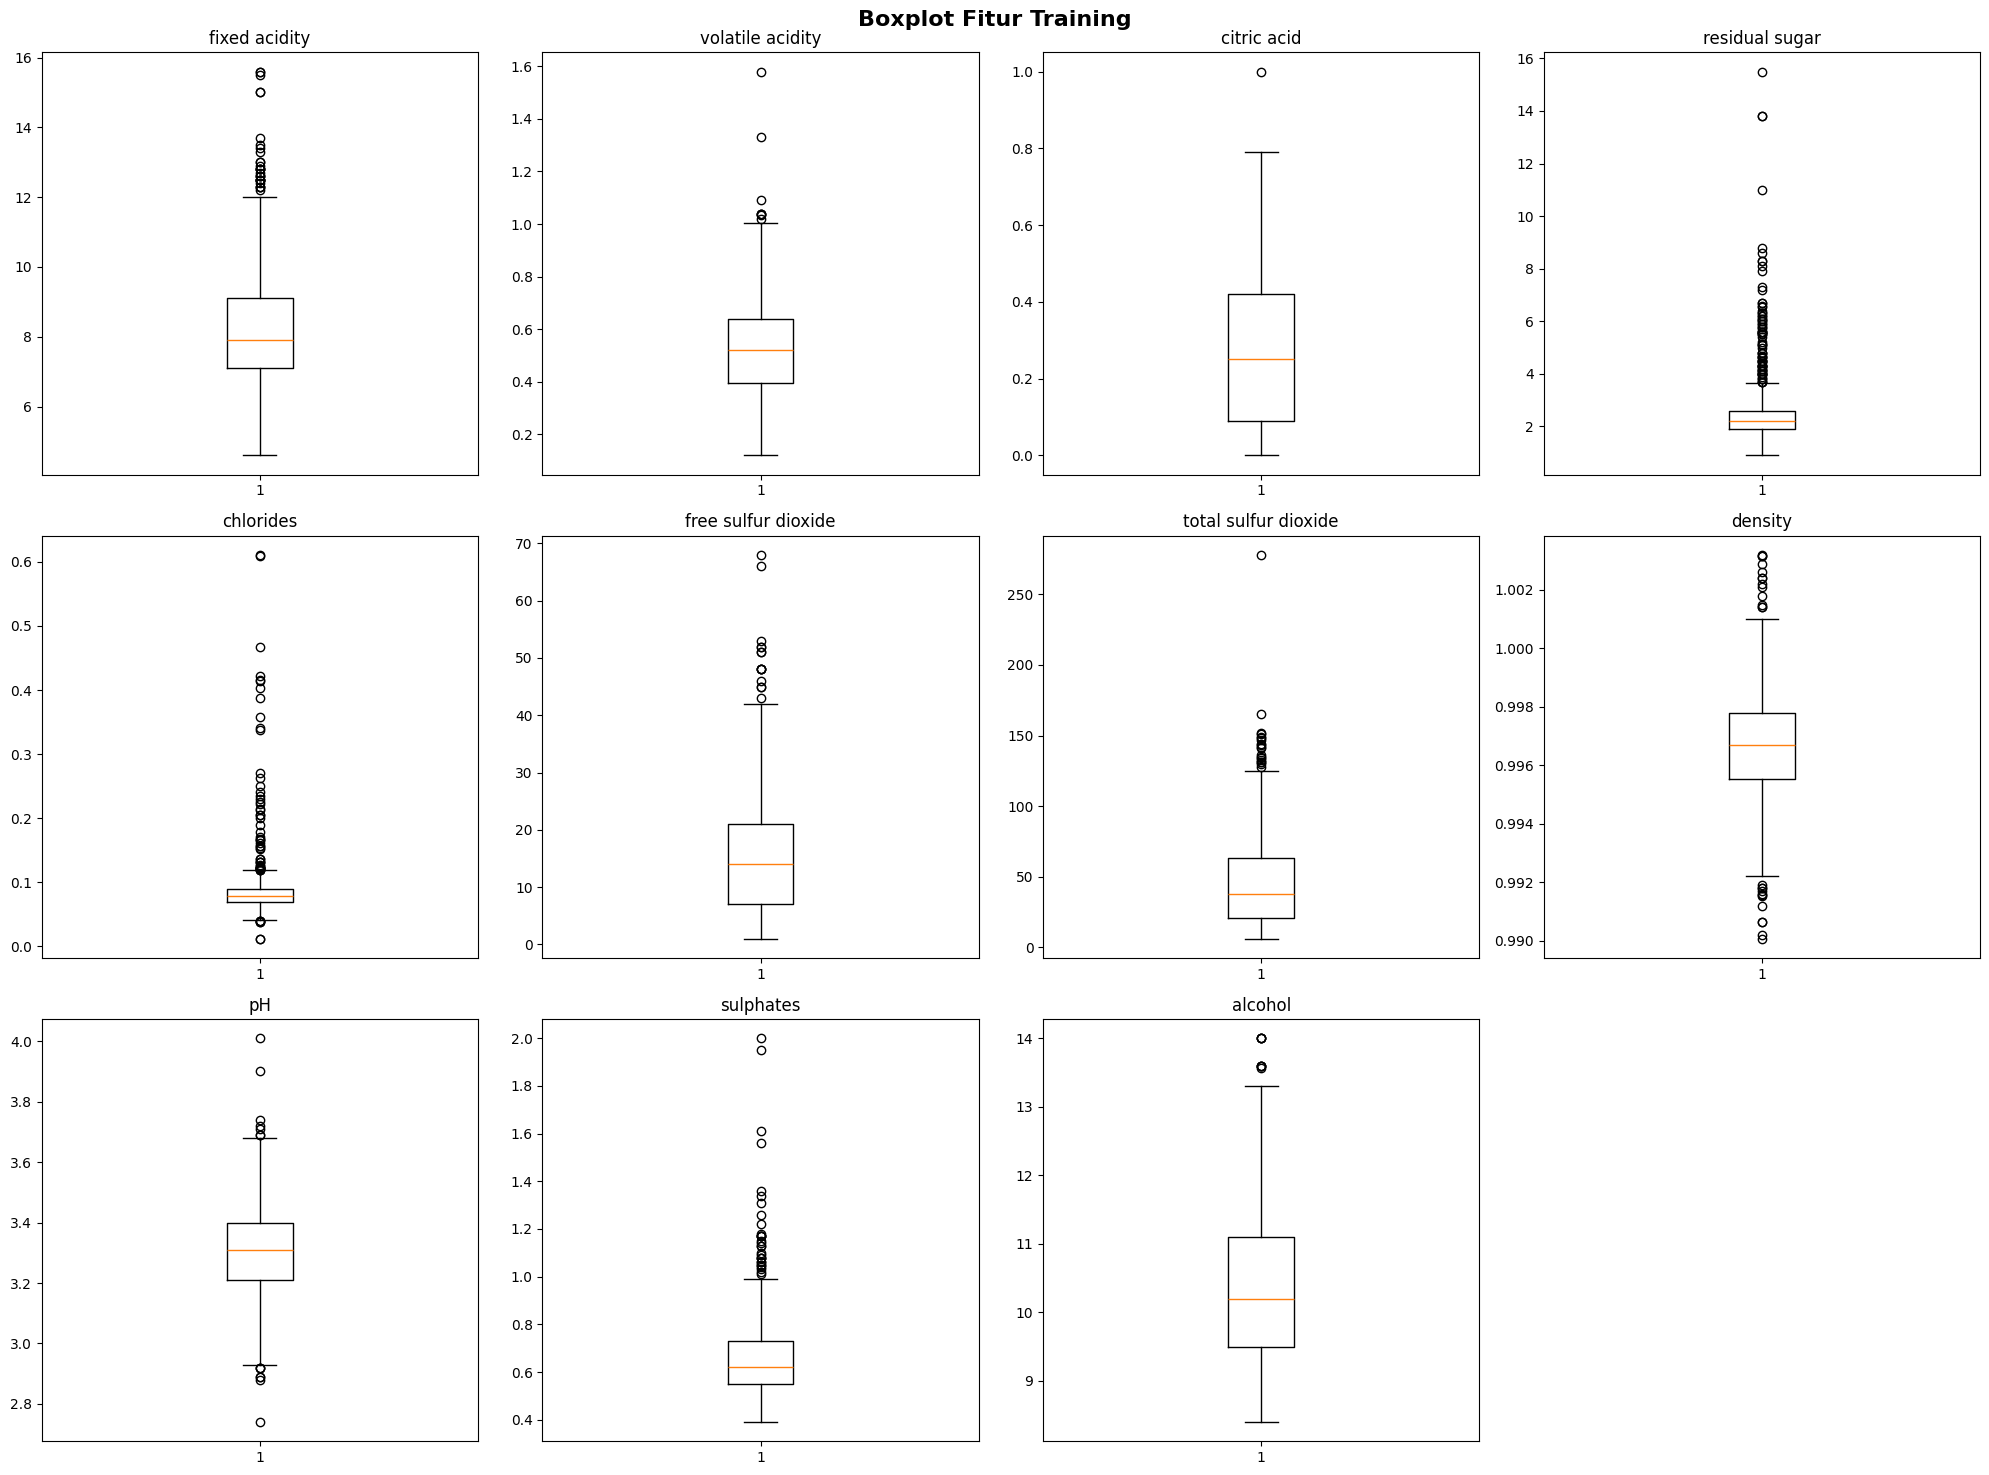

Jumlah outlier tiap fitur:
fixed acidity           30
volatile acidity         8
citric acid              1
residual sugar          76
chlorides               59
free sulfur dioxide     15
total sulfur dioxide    19
density                 25
pH                      14
sulphates               31
alcohol                  9
quality                 19
Id                       0
dtype: int64


In [237]:
#visualisasi boxplot untuk melihat skala fitur
num_cols = X_train.columns.tolist()
print("Boxplot Fitur Training:")
plt.figure(figsize=(20, 15))
plt.suptitle("Boxplot Fitur Training", fontsize=16, fontweight='bold')
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(X_train[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

#cek outlier
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Jumlah outlier tiap fitur:")
outlier_count = ((df_train < lower_bound) | (df_train > upper_bound)).sum()
print(outlier_count)

 Dari pengecekan outlier diatas terlihat bahwa fitur residual sugar dan chlorides memeiliki jumlah outlier tertinggi. Fitur seperti fixed acidity, sulphates, dan density juga memiliki jumlah outlier cukup banyak. Sementara itu, fitur citric acid dan volatile acidity dengan sedikit outlier. Karena sebaran datanya tidak seragam dan beberapa fitur memiliki rentang nilai yang jauh berbeda, maka scaling perlu dilakukan agar distribusi setiap fitur menjadi lebih seragam sebelum proses pelatihan model dilakukan.

Jumlah baris dataset train sebelum hapus outlier (Z-score): 857
Jumlah baris dataset train setelah hapus outlier (Z-score): 776 (kehilangan 81 baris)


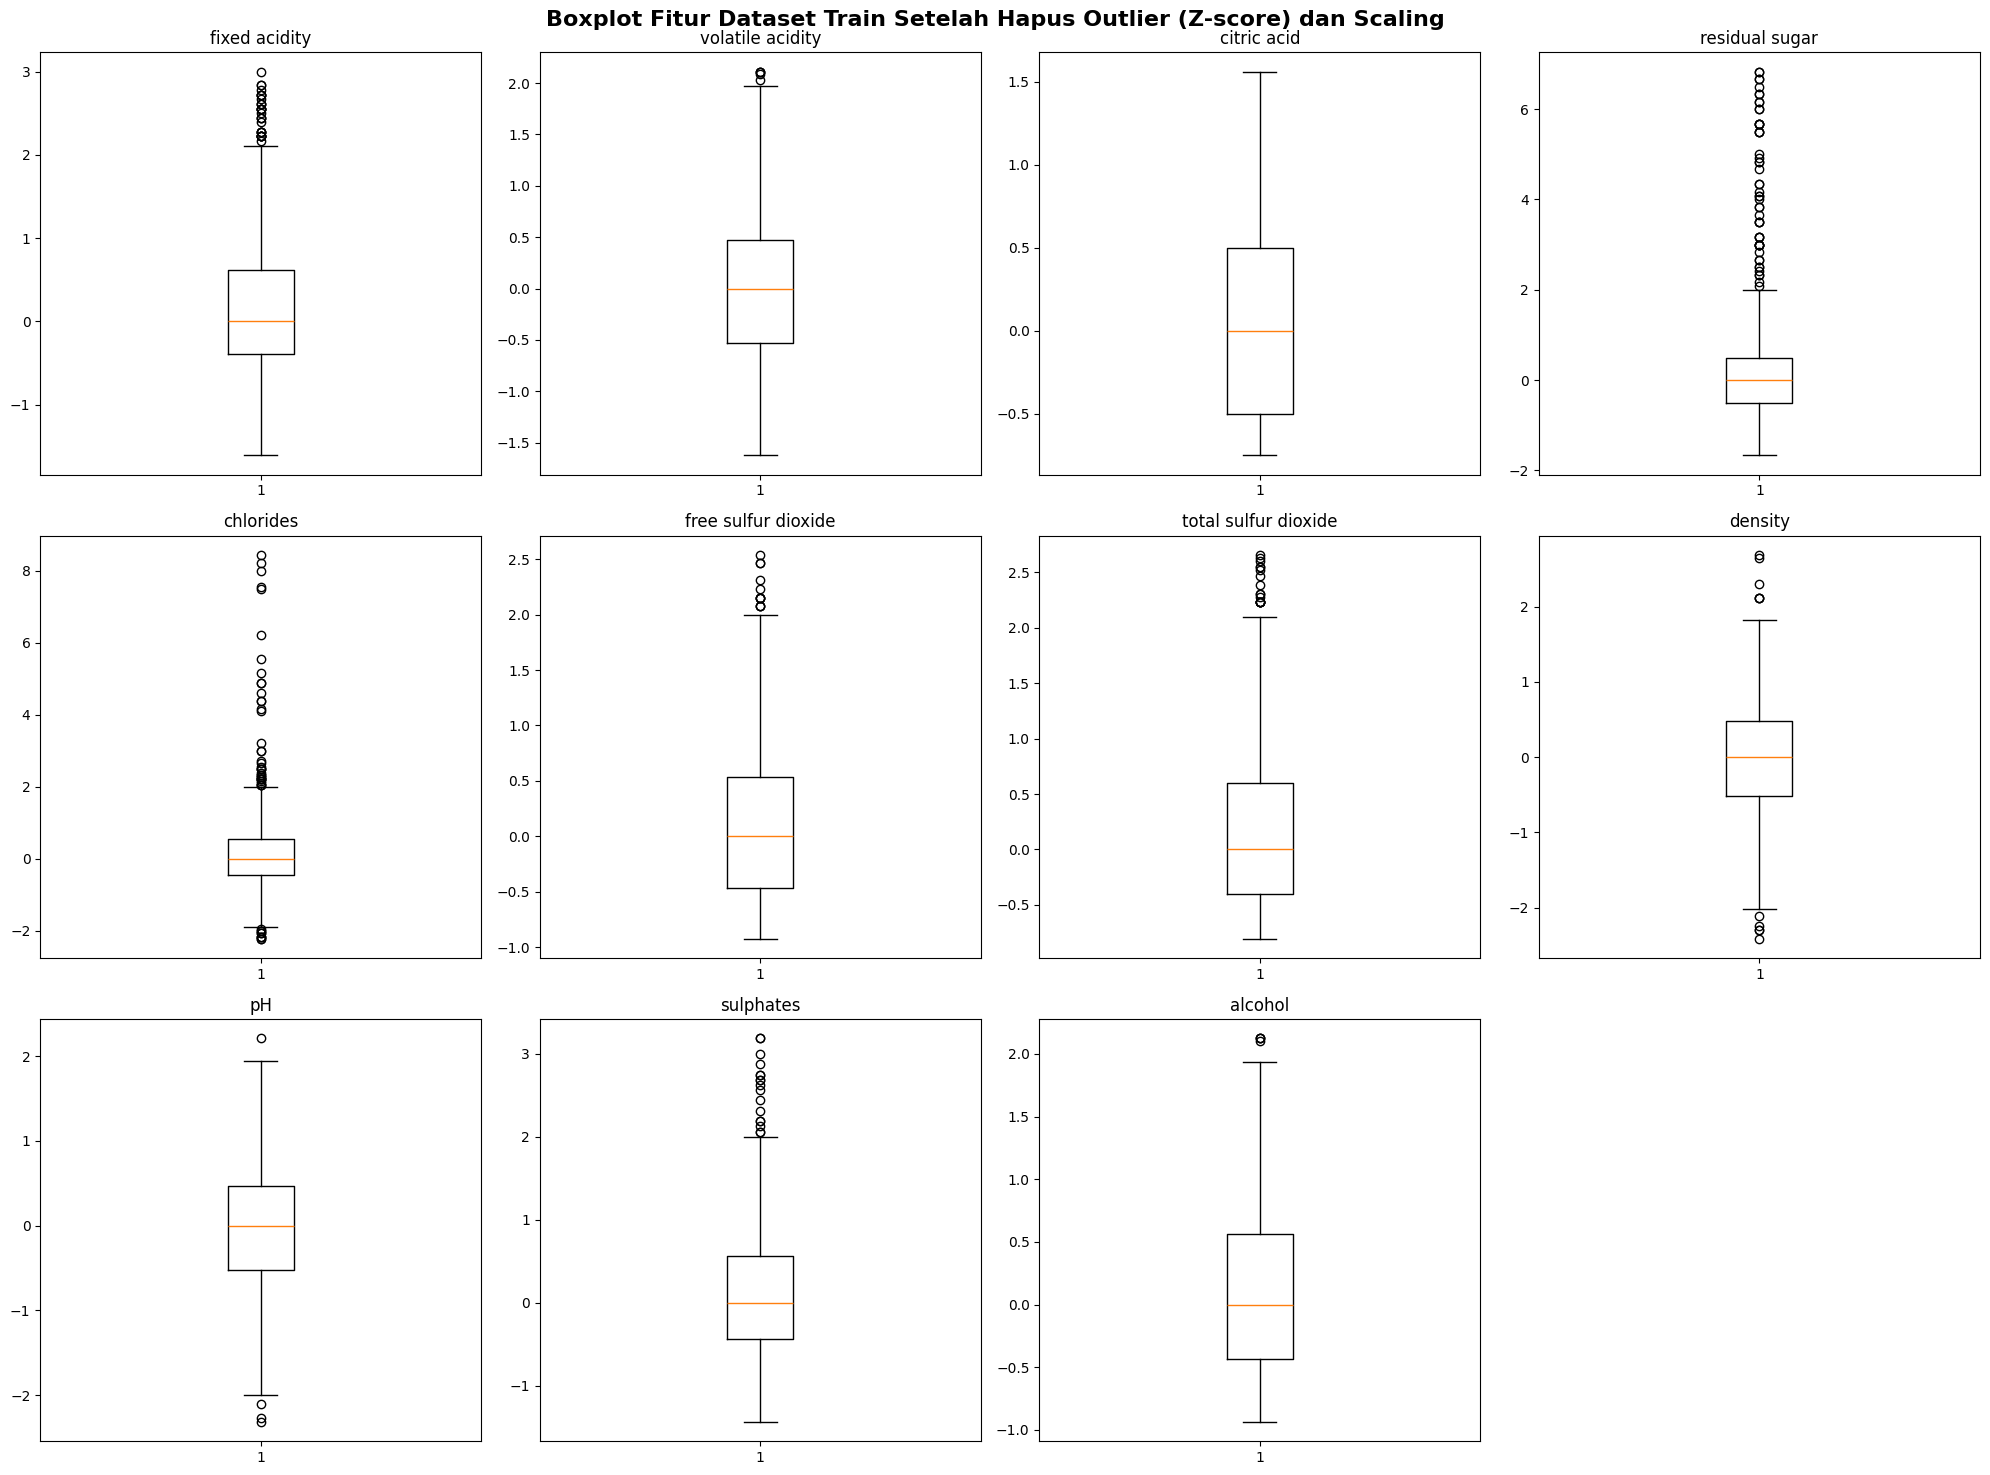


Statistik deskriptif setelah Z-score dan scaling:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count     776.000000        776.000000   776.000000      776.000000   
mean        0.175687          0.028390     0.051144        0.270941   
std         0.883946          0.692877     0.589123        1.350747   
min        -1.611111         -1.624365    -0.750000       -1.666667   
25%        -0.388889         -0.527919    -0.500000       -0.500000   
50%         0.000000          0.000000     0.000000        0.000000   
75%         0.611111          0.472081     0.500000        0.500000   
max         3.000000          2.111675     1.562500        6.833333   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  776.000000           776.000000            776.000000  776.000000   
mean     0.166309             0.151963              0.188058    0.017314   
std      1.208623             0.704776              0.744314    0.817956   
min  

In [240]:
from scipy import stats
from sklearn.preprocessing import RobustScaler

#mengabungkan X_train dan y_train
train_data = X_train.copy()
train_data['quality'] = y_train

#hitung Z-score dan hapus outlier
z = np.abs(stats.zscore(train_data._get_numeric_data()))
print(f"Jumlah baris dataset train sebelum hapus outlier (Z-score): {train_data.shape[0]}")

#hapus baris (fitur yang memiliki |Z| >= 1)
train_data_clean = train_data[(z < 3).all(axis=1)]
print(f"Jumlah baris dataset train setelah hapus outlier (Z-score): {train_data_clean.shape[0]} (kehilangan {train_data.shape[0] - train_data_clean.shape[0]} baris)")

#pisah X_train_clean dan y_train_clean
X_train_clean = train_data_clean.drop(columns=['quality'])
y_train_clean = train_data_clean['quality']

#scaling setelah hapus outlier (RobustScaler)
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train_clean)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_clean.columns)

#visualisasi boxplot setelah ditangani
num_cols = X_train_scaled.columns.tolist()
plt.figure(figsize=(20, 15))
plt.suptitle("Boxplot Fitur Dataset Train Setelah Hapus Outlier (Z-score) dan Scaling", fontsize=16, fontweight='bold')
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(X_train_scaled[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#cekek statistik deskriptif
print("\nStatistik deskriptif setelah Z-score dan scaling:")
print(X_train_scaled.describe())

Setelah penghapusan outlier menggunakan metode Z-score, jumlah data berkurang dari 857 menjadi 776 baris, artinya terdapat 81 data yang dianggap ekstrem dan dihapus. Hal ini dilakukan untuk menjaga kualitas data agar tidak ada nilai yang terlalu menyimpang memengaruhi hasil model. Setelah dilakukan scaling, seluruh fitur memiliki nilai yang sudah dinormalisasi dengan rata-rata mendekati 0 dan rentang data yang relatif seragam.

Cek Distribusi Kolom 'quality' di Dataset Training:


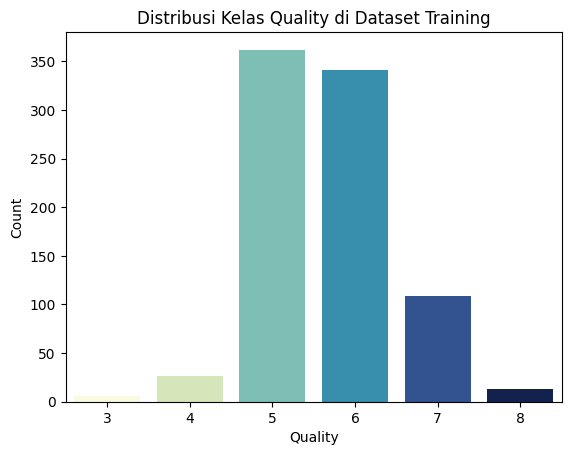

Persentase setiap kelas quality:
quality
5    42.240373
6    39.789965
7    12.718786
4     3.033839
8     1.516919
3     0.700117
Name: count, dtype: float64

Dataset SEIMBANG: Tidak ada kelas yang dominan (>70%).


In [241]:
#cek distribusi kolom 'quality' (imbalanced atau tidak)
print("Cek Distribusi Kolom 'quality' di Dataset Training:")
sns.countplot(x='quality', data=df_train, hue='quality', palette='YlGnBu', legend=False)
plt.title("Distribusi Kelas Quality di Dataset Training")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

#hitung persentase setiap kelas
persentase = df_train['quality'].value_counts() / df_train.shape[0] * 100
print("Persentase setiap kelas quality:")
print(persentase)

#analisis imbalance
max_persen = persentase.max()
if max_persen > 70:
    print(f"\nDataset IMBALANCED: Kelas terbesar ({persentase.idxmax()}) mencapai {max_persen:.2f}% dari total data.")
else:
    print(f"\nDataset SEIMBANG: Tidak ada kelas yang dominan (>70%).")

Hasil analisis distribusi kolom ‘quality’ menunjukkan bahwa dataset tergolong seimbang, karena tidak ada satu kelas yang mendominasi lebih dari 70% dari total data. Kelas 5 dan 6 memiliki proporsi terbesar yaitu sekitar 42% dan 40%, sementara kelas 7, 4, 8, dan 3 memiliki proporsi yang lebih kecil. Kondisi ini baik untuk pelatihan model karena tidak terjadi imbalance class, sehingga model tidak akan cenderung memprediksi kelas mayoritas saja.

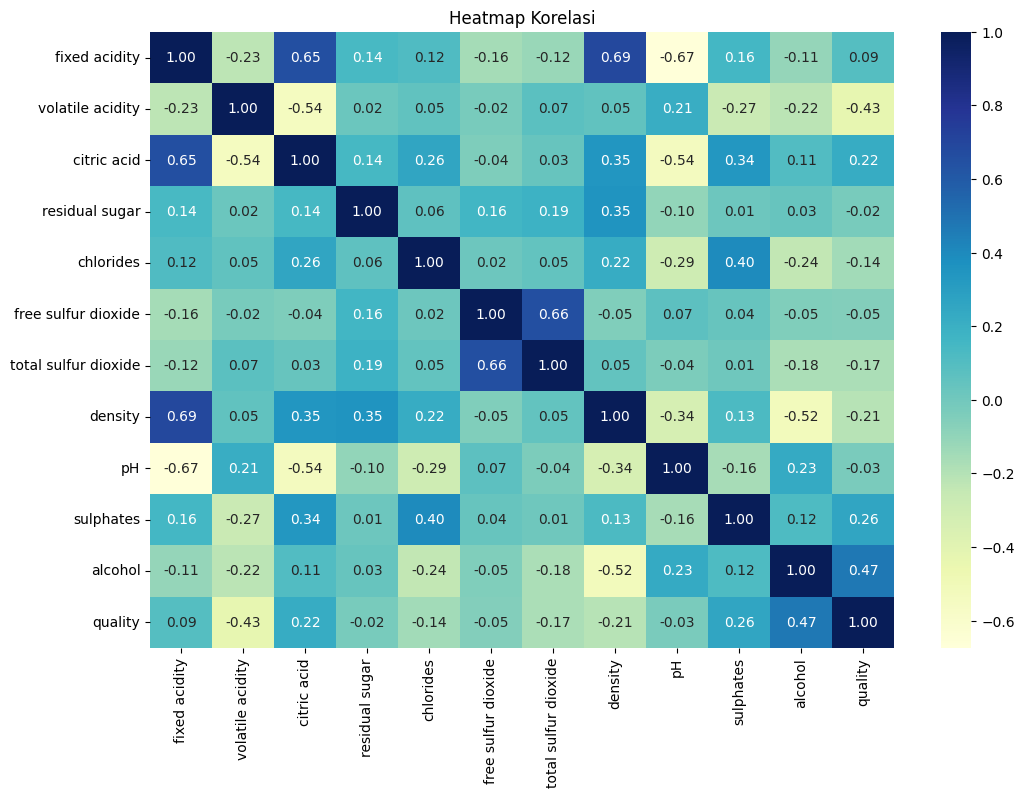

In [242]:
#hitung matriks korelasi
df_train_no_id = df_train.drop(columns=['Id'])
correlation_matrix = df_train_no_id.corr()
#plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

Dari matriks korelasi di atas, terlihat bahwa korelasi tertinggi terdapat antara free sulfur dioxide dan total sulfur dioxide dengan nilai 0.66, yang menunjukkan hubungan positif kuat,dimanajika semakin tinggi kadar free sulfur dioxide, maka total sulfur dioxide juga cenderung meningkat. Selain itu, terdapat korelasi negatif kuat antara fixed acidity dan pH sebesar -0.67, menandakan bahwa semakin tinggi keasaman, pH akan semakin rendah. Berdasarkan hal ini, fitur-fitur seperti free sulfur dioxide, total sulfur dioxide, fixed acidity, dan pH berpotensi menjadi variabel penting yang memengaruhi kualitas wine.

**Pemodelan**

Pada tahap ini akan dilakukan pembangunan beberapa model. Terdapat lima metode yang akan digunakan, yaitu Logistic Regression, Naive Bayes,Random Forest, K-Nearest Neighbors (KNN), dan Decision Tree. Setiap model akan dilatih menggunakan data training, kemudian dievaluasi untuk menentukan metode yang memberikan hasil terbaik dalam memprediksi kualitas wine.

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, average_precision_score, roc_auc_score
from sklearn.preprocessing import label_binarize

**Spliting Data**

Selanutnya data dibagi menjadi dua bagian yaitu 80% untuk data training yang digunakan melatih model, dan 20% untuk data testing yang digunakan menguji kinerja model agar hasilnya lebih objektif.


In [253]:
from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)
print("Jumlah data training (80%):", X_train_split.shape[0])
print("Jumlah data testing (20%):", X_test_split.shape[0])
print("Distribusi y_train_split:", y_train_split.value_counts())
print("Distribusi y_test_split:", y_test_split.value_counts())

Jumlah data training (80%): 685
Jumlah data testing (20%): 172
Distribusi y_train_split: quality
5    289
6    273
7     87
4     21
8     10
3      5
Name: count, dtype: int64
Distribusi y_test_split: quality
5    73
6    68
7    22
4     5
8     3
3     1
Name: count, dtype: int64


In [254]:
print("Deskripsi data training:")
print(X_train_split.info())
print("\nDeskripsi data testing:")
print(X_test_split.info())

Deskripsi data training:
<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 177 to 468
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         685 non-null    float64
 1   volatile acidity      685 non-null    float64
 2   citric acid           685 non-null    float64
 3   residual sugar        685 non-null    float64
 4   chlorides             685 non-null    float64
 5   free sulfur dioxide   685 non-null    float64
 6   total sulfur dioxide  685 non-null    float64
 7   density               685 non-null    float64
 8   pH                    685 non-null    float64
 9   sulphates             685 non-null    float64
 10  alcohol               685 non-null    float64
dtypes: float64(11)
memory usage: 64.2 KB
None

Deskripsi data testing:
<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 492 to 634
Data columns (total 11 columns):
 #   Column                Non-Null 

In [255]:
#daftar model
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000, solver='liblinear'),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)}
#inisialisasi list untuk menyimpan hasil
model_names = []
accuracies = []
f1_scores = []
precisions = []
recalls = []

#evaluasi model
for name, model in models.items():
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_test_split)
    y_proba = model.predict_proba(X_test_split) if hasattr(model, 'predict_proba') else None
    cm = confusion_matrix(y_test_split, y_pred)
    print(f"Confusion matrix for {name} with 80%:20%:")
    print(cm)
    accuracy = accuracy_score(y_test_split, y_pred)
    precision = precision_score(y_test_split, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_split, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_split, y_pred, average='weighted', zero_division=0)

    #simpan hasil ke dalam list
    model_names.append(name)
    accuracies.append(accuracy)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

    print(f"accuracy_{name}: {accuracy:.4f}")
    print(f"precision_{name}: {precision:.4f}")
    print(f"recall_{name}: {recall:.4f}")
    print(f"f1-score_{name}: {f1:.4f}")
    print("-" * 50)

Confusion matrix for Logistic Regression with 80%:20%:
[[ 0  0  1  0  0  0]
 [ 0  0  4  0  1  0]
 [ 0  0 58 14  1  0]
 [ 0  0 23 44  1  0]
 [ 0  0  0 20  2  0]
 [ 0  0  0  3  0  0]]
accuracy_Logistic Regression: 0.6047
precision_Logistic Regression: 0.5522
recall_Logistic Regression: 0.6047
f1-score_Logistic Regression: 0.5621
--------------------------------------------------
Confusion matrix for Naive Bayes with 80%:20%:
[[ 0  0  1  0  0  0]
 [ 0  3  2  0  0  0]
 [ 1  5 37 28  2  0]
 [ 0  3 16 37 10  2]
 [ 0  0  1 11  8  2]
 [ 0  0  0  1  2  0]]
accuracy_Naive Bayes: 0.4942
precision_Naive Bayes: 0.5199
recall_Naive Bayes: 0.4942
f1-score_Naive Bayes: 0.5008
--------------------------------------------------
Confusion matrix for Random Forest with 80%:20%:
[[ 0  0  0  1  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0 58 14  1  0]
 [ 0  0 25 38  5  0]
 [ 0  0  0 14  8  0]
 [ 0  0  0  0  2  1]]
accuracy_Random Forest: 0.6105
precision_Random Forest: 0.5854
recall_Random Forest: 0.6105
f1-score_Ran

Dari hasil evaluasi kelima model, Random Forest memberikan akurasi tertinggi yaitu 0.6105, kemudian Logistic Regression dan Decision Tree yang sama-sama mencapai 0.6047 dan untuk Naive Bayes dan KNN menghasilkan akurasi lebih rendah.

accuracy_Logistic Regression: 0.6047
accuracy_Naive Bayes: 0.4942
accuracy_Random Forest: 0.6105
accuracy_KNN: 0.4651
accuracy_Decision Tree: 0.6047
Hasil evaluasi semua model:
                 Model  Accuracy  F1_Score  Precision    Recall
0        Random Forest  0.610465  0.590936   0.585353  0.610465
1  Logistic Regression  0.604651  0.562083   0.552156  0.604651
2        Decision Tree  0.604651  0.602461   0.604578  0.604651
3          Naive Bayes  0.494186  0.500769   0.519912  0.494186
4                  KNN  0.465116  0.433504   0.432607  0.465116


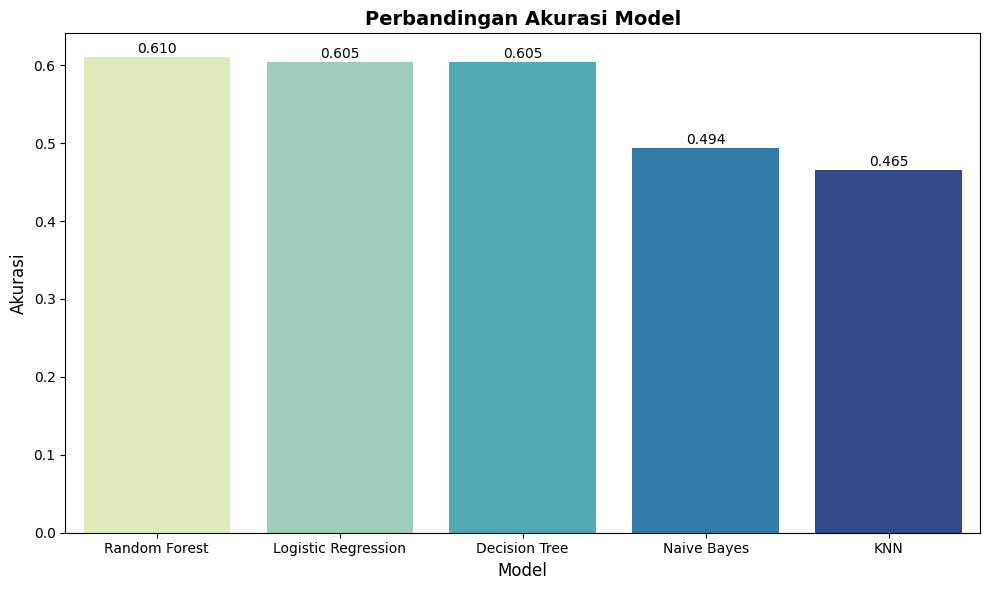

In [256]:
#inisialisasi list
model_names = []
accuracies = []
f1_scores = []
precisions = []
recalls = []

#loop untuk kumpul data
for name, model in models.items():
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_test_split)
    accuracy = accuracy_score(y_test_split, y_pred)
    precision = precision_score(y_test_split, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_split, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_split, y_pred, average='weighted')
    model_names.append(name)
    accuracies.append(accuracy)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    print(f"accuracy_{name}: {accuracy:.4f}")
#buat dataframe
results = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1_Score': f1_scores,
    'Precision': precisions,
    'Recall': recalls
})
# urutan berdasarkan akurasi
best_model_df = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print("Hasil evaluasi semua model:")
print(best_model_df)
#visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=best_model_df, x='Model', y='Accuracy', hue='Model', palette='YlGnBu', legend=False)
plt.title('Perbandingan Akurasi Model', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
for i, v in enumerate(best_model_df['Accuracy']):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

Berdasarkan hasil evaluasi di atas, model Random Forest memiliki nilai akurasi tertinggi sebesar 0.6105 (61,05%), sedikit lebih baik dibandingkan model lainnya seperti Logistic Regression dan Decision Tree yang sama-sama berada di kisaran 60,47%. Jadi, Random Forest dipilih sebagai model terbaik untuk memprediksi kualitas wine pada dataset data_testing.csv.

Akurasi pada data test split: 0.61

Confusion Matrix:
[[ 0  0  0  1  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0 58 14  1  0]
 [ 0  0 25 38  5  0]
 [ 0  0  0 14  8  0]
 [ 0  0  0  0  2  1]]


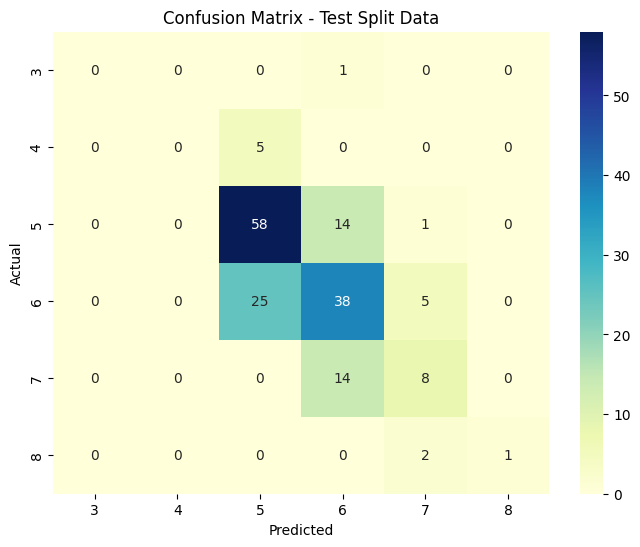


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.66      0.79      0.72        73
           6       0.57      0.56      0.56        68
           7       0.50      0.36      0.42        22
           8       1.00      0.33      0.50         3

    accuracy                           0.61       172
   macro avg       0.45      0.34      0.37       172
weighted avg       0.59      0.61      0.59       172



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [265]:
#pilih dan latih model di split training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

#cross validation data training
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_split, y_train_split, cv=cv, scoring='accuracy')

#evaluasi model pada data test split
y_test_pred = model.predict(X_test_split)
accuracy = accuracy_score(y_test_split, y_test_pred)
print(f"Akurasi pada data test split: {accuracy:.2f}")

#confusion matrix
cm = confusion_matrix(y_test_split, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

#visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=sorted(y_test_split.unique()), yticklabels=sorted(y_test_split.unique()))
plt.title('Confusion Matrix - Test Split Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#classification report
print("\nClassification Report:")
print(classification_report(y_test_split, y_test_pred))

Feature Importance

Ranking Fitur Berdasarkan Importance:
                 Feature  Importance
10               alcohol    0.136099
9              sulphates    0.121307
1       volatile acidity    0.115897
6   total sulfur dioxide    0.092834
7                density    0.087432
4              chlorides    0.085872
2            citric acid    0.076965
0          fixed acidity    0.075166
8                     pH    0.071518
5    free sulfur dioxide    0.069549
3         residual sugar    0.067362


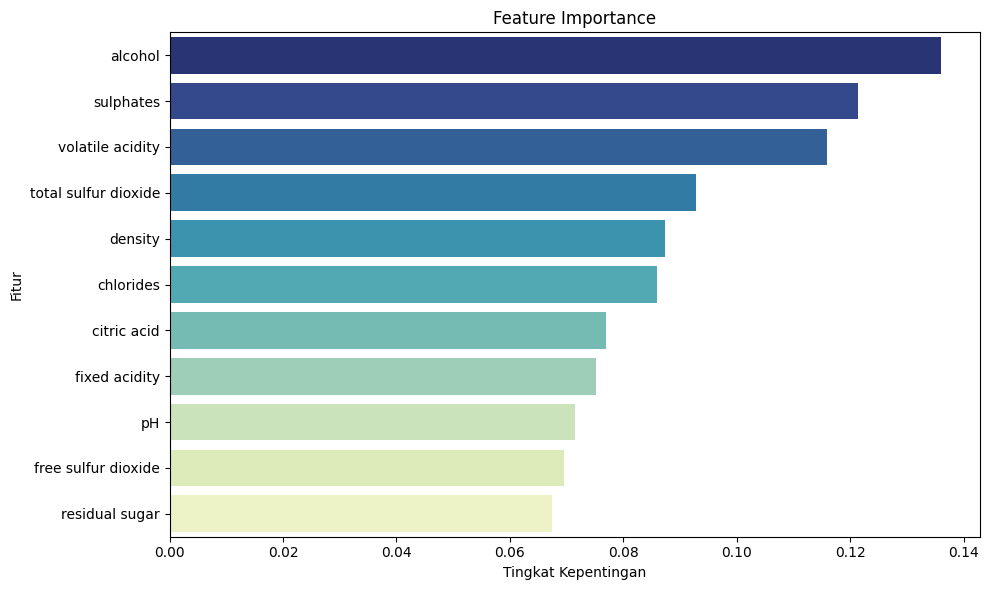

In [274]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Ranking Fitur Berdasarkan Importance:")
print(feature_importances)

#visualisasi dalam diagram batang
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', hue='Feature', palette='YlGnBu_r', legend=False)
plt.title('Feature Importance')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

Hasil feature importance menunjukkan ranking pengaruh fitur terhadap prediksi kualitas wine pada model Random Forest. Fitur paling penting adalah alcohol (0.136), diikuti oleh sulphates (0.121) dan volatile acidity (0.116), yang berarti model paling banyak menganalisis ketiga fitur ini saat memprediksi quality.

In [266]:
#simpan model
import joblib
joblib.dump(model, 'wine_quality_model.pkl')
print("\nModel disimpan sebagai 'wine_quality_model.pkl'")


Model disimpan sebagai 'wine_quality_model.pkl'


**PREDIKSI DATA TEST**

In [267]:
#prediksi pada data testing
y_test_pred = model.predict(X_test_scaled)

# Filter test_ids to match the rows in X_test_scaled (which came from X_test_clean)
filtered_test_ids = test_ids.loc[X_test_clean.index]

result_df = pd.DataFrame({
    'Id': filtered_test_ids,
    'quality': y_test_pred
})
print("Hasil prediksi (5 baris pertama):")
print(result_df.head())

#simpan ke file CSV
result_df.to_csv('hasilprediksi_042.csv', index=False)
print("\nFile 'hasilprediksi_042.csv' berhasil disimpan.")

Hasil prediksi (5 baris pertama):
     Id  quality
0   222        5
1  1514        6
2   417        5
4   516        5
5  1120        6

File 'hasilprediksi_042.csv' berhasil disimpan.
